In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as cl

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge


In [4]:
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2_score

In [5]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (20, 10)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [8]:
df = pd.read_csv("/content/House_Data.csv")
df.set_index('Id', inplace=True)
df.head(30)

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,
1,8450,196.0,150,856,856,854,1710,548,0,61,208500
2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
3,11250,162.0,434,920,920,866,1786,608,0,42,223500
4,9550,0.0,540,756,961,756,1717,642,0,35,140000
5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000
6,14115,0.0,64,796,796,566,1362,480,40,30,143000
7,10084,186.0,317,1686,1694,0,1694,636,255,57,307000
8,10382,240.0,216,1107,1107,983,2090,484,235,204,200000
9,6120,0.0,952,952,1022,752,1774,468,90,0,129900


In [9]:
temp_df = pd.read_csv("/content/House_Data.csv")
temp_df.set_index('Id', inplace=True)
temp_df.head()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,
1,8450,196.0,150,856,856,854,1710,548,0,61,208500
2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
3,11250,162.0,434,920,920,866,1786,608,0,42,223500
4,9550,0.0,540,756,961,756,1717,642,0,35,140000
5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000


In [10]:
df.describe()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,103.685262,567.240411,1057.429452,1162.626712,346.992466,1515.463699,472.980137,94.244521,46.660274,180921.195890
std,9981.264932,181.066207,441.866955,438.705324,386.587738,436.528436,525.480383,213.804841,125.338794,66.256028,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,129975.000000
50%,9478.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,163000.000000
75%,11601.500000,166.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,214000.000000
max,215245.000000,1600.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,755000.000000


Axes(0.125,0.11;0.0596154x0.77) Axes(0.196538,0.11;0.0596154x0.77) Axes(0.268077,0.11;0.0596154x0.77)


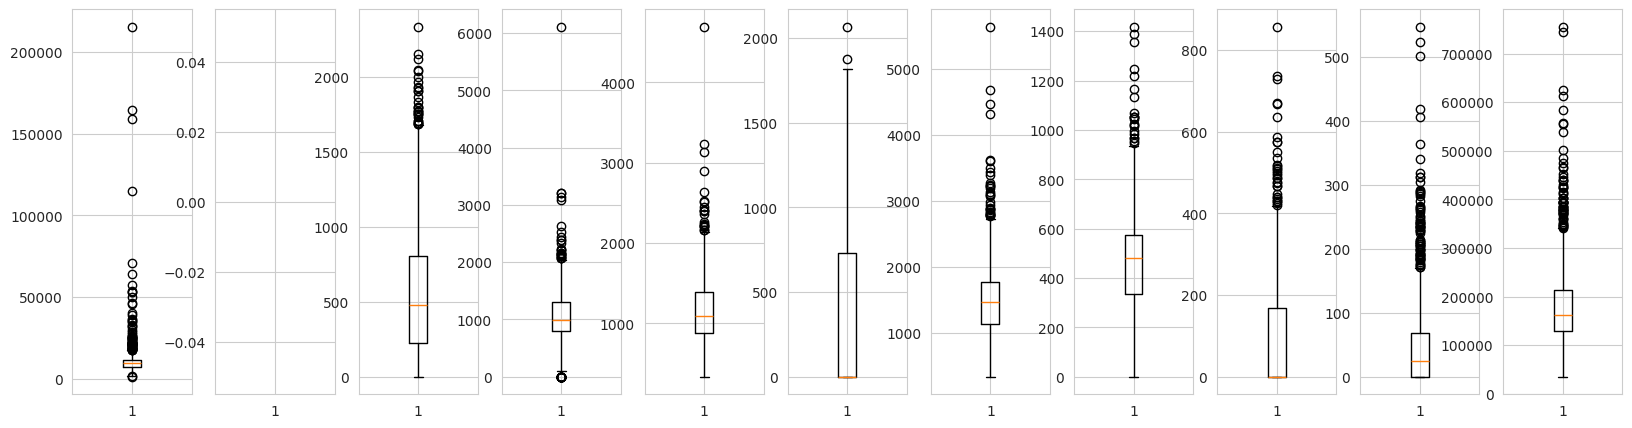

In [11]:
fig, axs = plt.subplots(1, len(df.columns), figsize=(20, 5))
print(axs[0], axs[1],axs[2])

for i, column in enumerate(df.columns):
  axs[i].boxplot(df[column])

#for i in range(0,len(df.columns)):
  #plt.boxplot(df.iloc[:,i])

In [12]:
df['MasVnrArea'].dtype == '0'

False

In [13]:
mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")
constant_value = SimpleImputer(strategy="constant", fill_value=0)

In [14]:
median_imputer.fit(df)

SimpleImputer(strategy='median')

In [15]:
constant_value.fit(df)
df = constant_value.transform(df)

In [16]:
df = pd.DataFrame(df)

In [17]:
df.columns = temp_df.columns

In [18]:
df.isnull().sum()

,0
LotArea,0
MasVnrArea,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
2ndFlrSF,0
GrLivArea,0
GarageArea,0
WoodDeckSF,0
OpenPorchSF,0


<Axes: xlabel='MasVnrArea', ylabel='Count'>

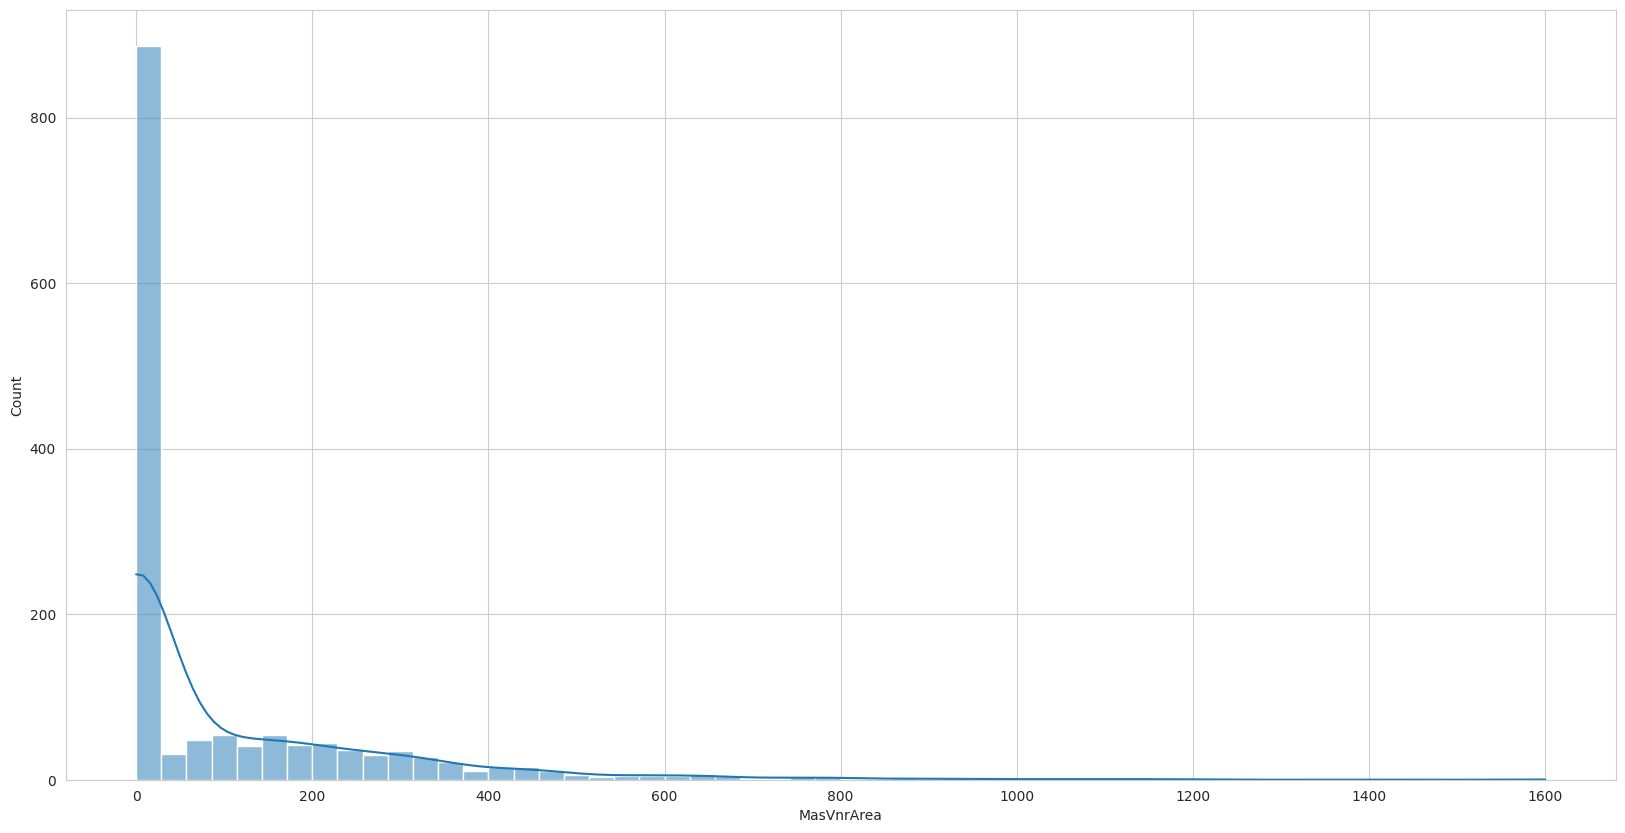

In [19]:
sns.histplot(data=df, x='MasVnrArea', kde=True)

In [20]:
value_counts = df['MasVnrArea'].value_counts().sort_values(ascending = False)
percentage_value_counts = (value_counts/len(df))*100
percentage_value_counts

,count
MasVnrArea,
0.0,59.520548
72.0,0.547945
108.0,0.547945
180.0,0.547945
120.0,0.479452
...,...
760.0,0.068493
391.0,0.068493
27.0,0.068493


In [21]:
df = df.astype(int)

In [22]:
df.dtypes

,0
LotArea,int64
MasVnrArea,int64
BsmtUnfSF,int64
TotalBsmtSF,int64
1stFlrSF,int64
2ndFlrSF,int64
GrLivArea,int64
GarageArea,int64
WoodDeckSF,int64
OpenPorchSF,int64


<Axes: >

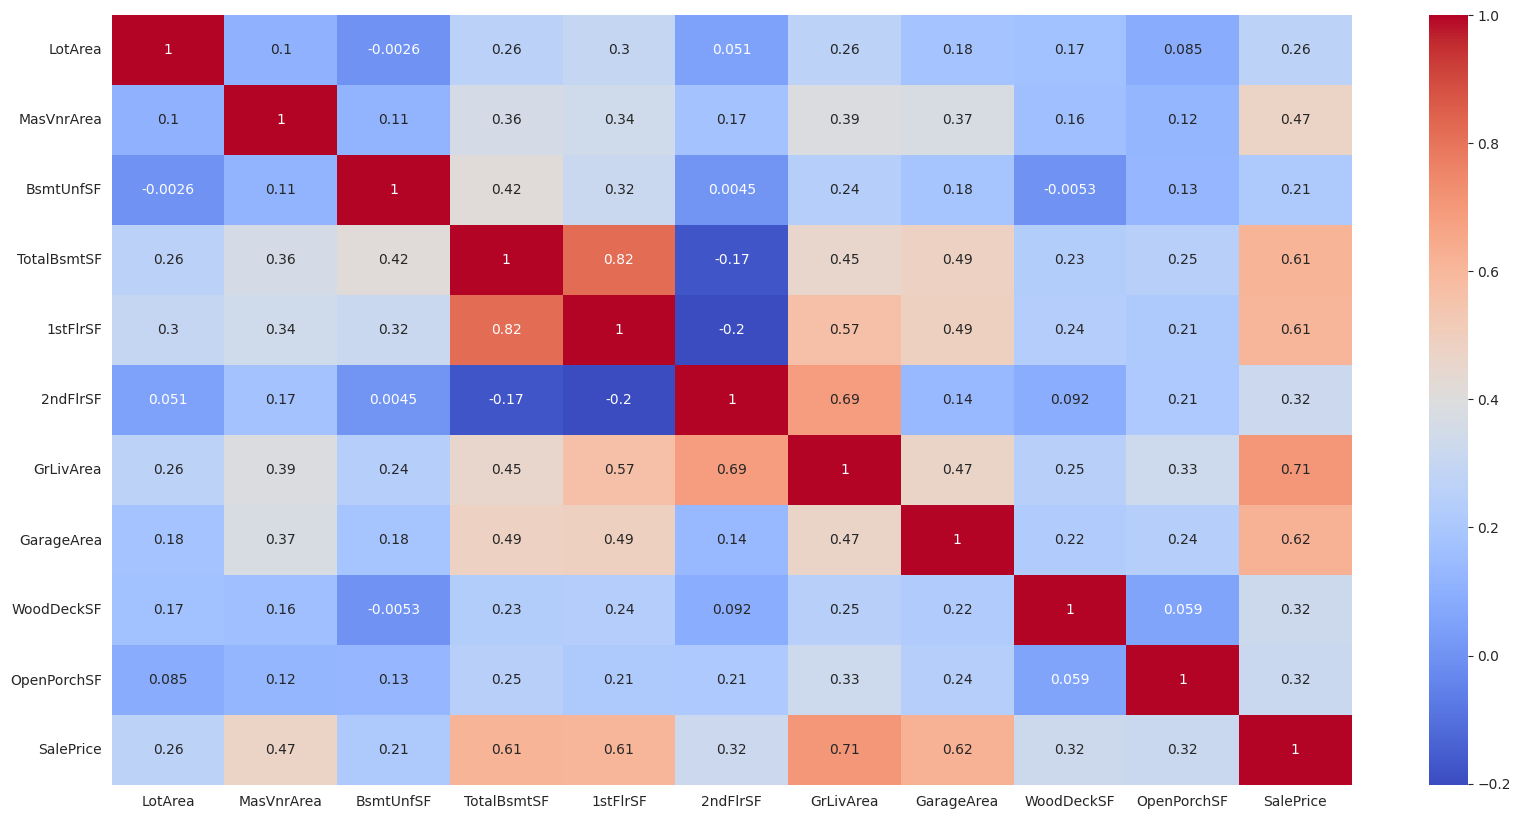

In [23]:
#correlation matrix with data
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [26]:
#feature selection and data split

X_var = df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']].values
y_var = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size=0.2, random_state=0)

print(cl('X_train samples : ',attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ',attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ',attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ',attrs = ['bold']), y_test[0:5])


X_train samples :  [[ 11694    452   1774   1822   1828      0   1828    774      0    108
  314813]
 [  6600      0    894    894    894      0    894    308      0      0
  109500]
 [ 13360      0    163    876    964      0    964    432      0      0
  163500]
 [ 13265    148    350   1568   1689      0   1689    857    150     59
  271000]
 [ 13704    150   1541   1541   1541      0   1541    843    468     81
  205000]]
X_test samples :  [[ 32668      0    816   2035   2515      0   2515    484      0      0
  200624]
 [  9490      0    238    806    958    620   1578    240      0      0
  133000]
 [  7015    161    524    709    979    224   1203    352      0      0
  110000]
 [ 10005    299    768   1160   1156    866   2022    505    288    117
  192000]
 [  1680    381    525    525    525    567   1092    264      0      0
   88000]]
y_train samples :  618    314813
870    109500
92     163500
817    271000
302    205000
Name: SalePrice, dtype: int64
y_test samples :  529 

In [27]:
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_predict = ols.predict(X_test)

In [28]:
ridge_ln = Ridge(alpha = 1)
ridge_ln.fit(X_train, y_train)
ridge_ln_predict = ridge_ln.predict(X_test)

In [29]:
lasso_ln = Lasso(alpha = 0.08)
lasso_ln.fit(X_train, y_train)
lasso_ln_predict = lasso_ln.predict(X_test)

In [33]:
baesian = BayesianRidge()
baesian.fit(X_train, y_train)
bayesian_yhat = baesian.predict(X_test)

In [34]:
en = ElasticNet(alpha = 0.09)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [35]:
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.9999999999771961
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.9999999999770509
-------------------------------------------------------------------------------


In [36]:
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.9999999999771961
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.9999999999770509
-------------------------------------------------------------------------------


In [38]:
print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2_score(y_test, ols_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2_score(y_test, ridge_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2_score(y_test, lasso_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2_score(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2_score(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 1.0
-------------------------------------------------------------------------------
R-Squared of Ridge model is 1.0
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.9999999999770851
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 1.0
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.9999999999769387
-------------------------------------------------------------------------------
